In [1]:
# Cell 9 (or start of a new notebook): Define Final Ground Truth
import numpy as np

# Final agreed-upon order (0-based indices)
# Based on user's 'latest_order' from previous step
ground_truth_order_indices = np.array([
    9, 20, 22, 14, 10, 4, 7, 0, 32, 13, 19, 12, 1, 30, 26, 11, 8, 5,
    2, 29, 15, 16, 25, 21, 31, 17, 23, 6, 24, 27, 28, 3, 18
])

# Quick verification
if len(ground_truth_order_indices) == 33 and len(np.unique(ground_truth_order_indices)) == 33:
    print("Ground Truth order defined successfully:")
    print(ground_truth_order_indices)
else:
    print("Error in ground_truth_order_indices definition. Please check the array.")

Ground Truth order defined successfully:
[ 9 20 22 14 10  4  7  0 32 13 19 12  1 30 26 11  8  5  2 29 15 16 25 21
 31 17 23  6 24 27 28  3 18]


In [3]:
# Cell 1 (in 02_baseline_PCA_MDS.ipynb): Setup and Load Data
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add project root to Python path to import 'src'
# Assumes this notebook is in Project/notebooks/
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path")

# Import the function from io_utils.py
try:
    from src.io_utils import load_face_data
    print("Successfully imported load_face_data from src.io_utils")
except ImportError as e:
    print(f"Failed to import load_face_data: {e}")
    print("Please ensure src/io_utils.py exists and Project root is in sys.path.")
    load_face_data = None

# Load the data
face_data = None # Initialize
if load_face_data:
    face_data = load_face_data(data_dir='../data', file_name='face.mat')
    if face_data is not None:
        # Verify shape (should be 3D)
        if face_data.ndim == 3 and face_data.shape[0] == 33:
             print(f"Data loaded successfully! Shape: {face_data.shape}")
             # Expected: (33, 92, 112)
        else:
             print(f"Data loaded, but shape {face_data.shape} is not the expected 3D shape (33, H, W).")
             face_data = None # Mark as invalid for subsequent steps
    else:
        print("Data loading failed.")
else:
    print("Cannot proceed without load_face_data function.")

Added '/Users/dingding/Desktop/大学博士阶段科研资料/课程资料/25spring/Topological and Geometric Data Reduction and Visualization/Project' to sys.path
Successfully imported load_face_data from src.io_utils
Keys in face.mat: dict_keys(['__header__', '__version__', '__globals__', 'Y', 'id'])
Data loaded successfully! Shape: (33, 92, 112)


In [4]:
# Cell 10: Reshape data for dimensionality reduction algorithms
if 'face_data' in locals() and face_data is not None and face_data.ndim == 3:
    n_samples = face_data.shape[0]
    # Reshape from (n_samples, height, width) to (n_samples, height * width)
    # height=92, width=112 based on loaded shape
    n_features = face_data.shape[1] * face_data.shape[2] # 92 * 112 = 10304
    flattened_face_data = face_data.reshape((n_samples, n_features))
    print(f"Data reshaped successfully to: {flattened_face_data.shape}")
    # Expected output: Data reshaped successfully to: (33, 10304)
elif 'flattened_face_data' not in locals():
    print("Error: face_data not loaded correctly in 3D shape. Cannot reshape.")
    # Set to None to prevent potential errors later if previous steps failed
    flattened_face_data = None

Data reshaped successfully to: (33, 10304)


In [5]:
# Cell 11 (in 02_baseline_PCA_MDS.ipynb or similar): Run PCA and MDS
import matplotlib.pyplot as plt
# Make sure necessary variables (flattened_face_data) and functions are available
# You might need to re-run the sys.path append cell if in a new notebook

# Import the embedding functions
try:
    from src.embedding import run_pca, run_mds
    print("Successfully imported run_pca, run_mds from src.embedding")
except ImportError as e:
    print(f"Failed to import from src.embedding: {e}")
    print("Please ensure src/embedding.py exists and contains run_pca, run_mds.")
    run_pca, run_mds = None, None # Prevent NameError

pca_embedding, mds_embedding = None, None # Initialize

# Run PCA (ensure flattened_face_data is valid)
if run_pca and flattened_face_data is not None:
    pca_embedding, pca_model = run_pca(flattened_face_data, n_components=2)
    print(f"PCA embedding shape: {pca_embedding.shape}") # Expected: (33, 2)

# Run MDS (ensure flattened_face_data is valid)
if run_mds and flattened_face_data is not None:
    # Note: MDS can be slow for high-dimensional data like this
    mds_embedding, mds_model = run_mds(flattened_face_data, n_components=2, random_state=42)
    print(f"MDS embedding shape: {mds_embedding.shape}") # Expected: (33, 2)

Successfully imported run_pca, run_mds from src.embedding
Running PCA with n_components=2...
PCA completed.
PCA embedding shape: (33, 2)
Running MDS with n_components=2...


/opt/anaconda3/envs/tgdr39/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 152 with stress 195547039.71726066
breaking at iteration 149 with stress 186688840.16468853
breaking at iteration 234 with stress 194136196.054825
breaking at iteration 115 with stress 194855075.18209332
MDS completed.
MDS embedding shape: (33, 2)


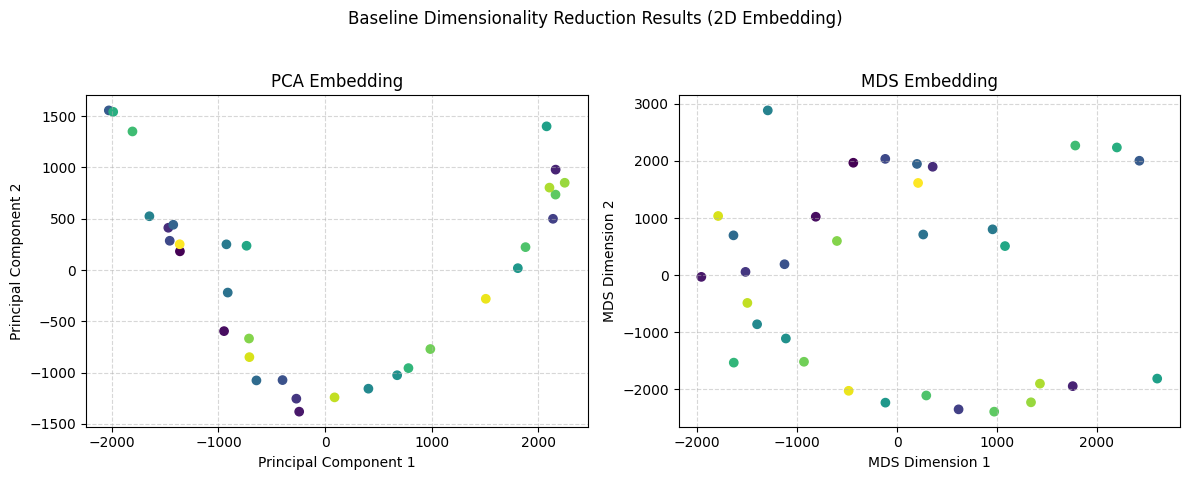

In [6]:
# Cell 12: Visualize PCA and MDS 2D Embeddings
if pca_embedding is not None and mds_embedding is not None:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Baseline Dimensionality Reduction Results (2D Embedding)')

    # Plot PCA results
    axes[0].scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=np.arange(n_samples), cmap='viridis')
    axes[0].set_title('PCA Embedding')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # Plot MDS results
    axes[1].scatter(mds_embedding[:, 0], mds_embedding[:, 1], c=np.arange(n_samples), cmap='viridis')
    axes[1].set_title('MDS Embedding')
    axes[1].set_xlabel('MDS Dimension 1')
    axes[1].set_ylabel('MDS Dimension 2')
    axes[1].grid(True, linestyle='--', alpha=0.5)

    # Add annotations (optional, can be cluttered for 33 points)
    # for i in range(n_samples):
    #    axes[0].text(pca_embedding[i, 0], pca_embedding[i, 1], str(i), fontsize=8)
    #    axes[1].text(mds_embedding[i, 0], mds_embedding[i, 1], str(i), fontsize=8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

elif pca_embedding is not None:
    print("MDS embedding not available. Plotting PCA only.")
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    ax.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=np.arange(n_samples), cmap='viridis')
    ax.set_title('PCA Embedding')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

elif mds_embedding is not None:
    print("PCA embedding not available. Plotting MDS only.")
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    ax.scatter(mds_embedding[:, 0], mds_embedding[:, 1], c=np.arange(n_samples), cmap='viridis')
    ax.set_title('MDS Embedding')
    ax.set_xlabel('MDS Dimension 1')
    ax.set_ylabel('MDS Dimension 2')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print("Neither PCA nor MDS embeddings are available for plotting.")

Plotting face images on MDS embedding coordinates...


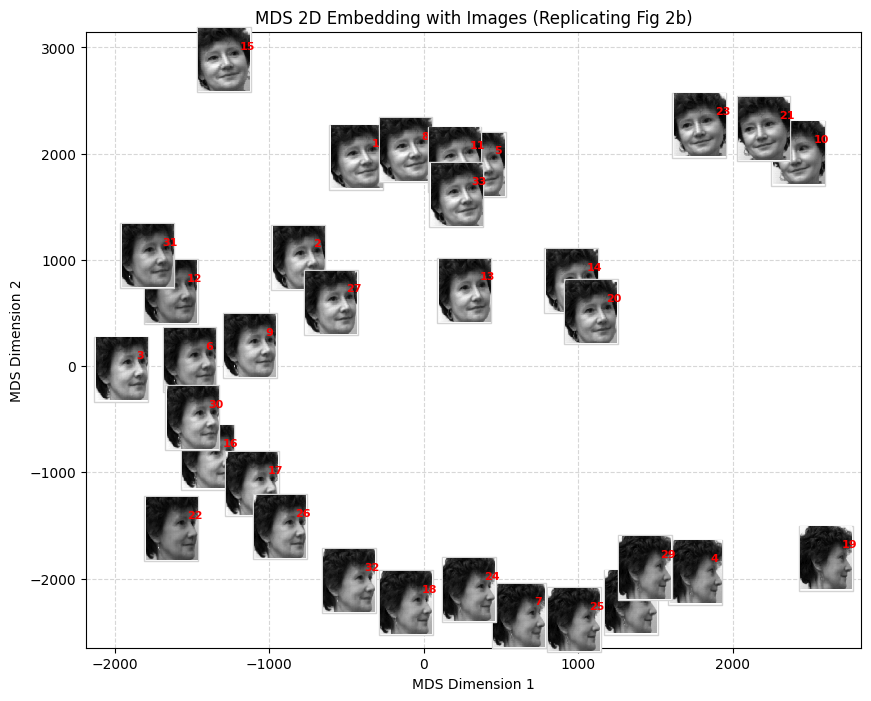

In [7]:
# Cell 13 (or similar): Replicate Figure 2(b) - Plot Images on MDS Embedding
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Check if necessary data exists
if ('mds_embedding' in locals() and mds_embedding is not None and
    'face_data' in locals() and face_data is not None and
     face_data.ndim == 3 and mds_embedding.shape == (33, 2) and
     face_data.shape[0] == 33):

    print("Plotting face images on MDS embedding coordinates...")

    fig, ax = plt.subplots(figsize=(10, 8)) # Adjust figure size as needed
    ax.set_title("MDS 2D Embedding with Images (Replicating Fig 2b)")
    ax.set_xlabel("MDS Dimension 1")
    ax.set_ylabel("MDS Dimension 2")

    # Get the x, y coordinates from MDS result
    x_coords = mds_embedding[:, 0]
    y_coords = mds_embedding[:, 1]

    # Loop through each data point (face)
    for i in range(face_data.shape[0]):
        # Get the coordinates
        x, y = x_coords[i], y_coords[i]

        # Get the image matrix and transpose for correct orientation
        img = face_data[i, :, :].T

        # Create an OffsetImage object
        # zoom controls the size of the plotted image, adjust as needed
        # cmap='gray' ensures it's plotted in grayscale
        imagebox = OffsetImage(img, zoom=0.4, cmap='gray')
        imagebox.image.axes = ax

        # Create an AnnotationBbox to place the image at the coordinate (x, y)
        ab = AnnotationBbox(imagebox, (x, y),
                            xycoords='data',
                            frameon=True, # Add a frame like in the example
                            pad=0.1, # Padding around image
                            bboxprops =dict(edgecolor='lightgray')) # Frame color

        ax.add_artist(ab)

        # Optional: Add the original index number near the image
        # Adjust text position (xytext) and appearance as needed
        ax.text(x + 100, y + 100, str(i+1), color='red', fontsize=8, weight='bold')


    # Adjust plot limits to make sure all images are visible
    ax.update_datalim(np.column_stack([x_coords, y_coords]))
    ax.autoscale_view()
    ax.grid(True, linestyle='--', alpha=0.5) # Add grid

    plt.show()

else:
    print("Error: Required variables 'mds_embedding' or 'face_data' not available or have incorrect shape.")
    print("Please run the previous cells for data loading and MDS calculation first.")